# Neural Network on Winedata using Tensorflow

This a simple neural network classification on the winedata, I have kept it simple, not much of the data preprocessing and visualization. 

Frankly speaking, this dataset is not a worth of Neural Networks, but I chose this dataset, since this is my first attempt on NN's and i want to keep it simple.

The dataset is available at 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

 The Column names and other details are at 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names'

In [9]:
colnames = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','dilute','Proline']

In [10]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names = colnames,index_col = False)

Snapshot of the data

In [11]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,dilute,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check if it has any null values

In [12]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
dilute                  0
Proline                 0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
dilute                  178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


To know about the class distribution.

In [14]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

Check which columns are correlated 

In [15]:
df.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,dilute,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


As shown above Ash has very very low correlation in detecting the class, so it can be removed to improve our model. I'm dropping the ash columns in the following code.

# We convert the Class labels into the Onehot format.

In [16]:
df = pd.get_dummies(df, columns=['Class'])

Now only take the labels into to new dataframe

In [17]:
labels = df.loc[:,['Class_1','Class_2','Class_3']]

For Neural Nets the data should be in numpy arrays, so convert them,

In [18]:
labels = labels.values

Now collect the features dataframe

In [19]:
features = df.drop(['Class_1','Class_2','Class_3','Ash'],axis = 1)

Convert the feature dataframe to numpy arrays

In [20]:
features = features.values

In [21]:
print(type(labels))
print(type(features))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Check the shape of the arrays

In [22]:
print(labels.shape)
print(features.shape)

(178, 3)
(178, 12)


Split into the training and testing sets, We have just 178 columns, which is a very very very small data for NN's

In [23]:
train_x,test_x,train_y,test_y = train_test_split(features,labels)

Print the shapes of the split datasets.

In [24]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(133, 12) (133, 3) (45, 12) (45, 3)


Everything looks good, so lets go further.

Neural Networks perform better if the data is scaled between (0,1). So, lets do it.

In [25]:
scale = MinMaxScaler(feature_range = (0,1))

In [26]:
train_x = scale.fit_transform(train_x)
test_x = scale.fit_transform(test_x)

Snapshot of the features and labels

In [27]:
print(train_x[0])

[0.47894737 0.48472505 0.58762887 0.39130435 0.23103448 0.05485232
 0.88679245 0.17350158 0.3668942  0.31707317 0.30769231 0.20143885]


In [28]:
print(train_y[0])

[0 0 1]


# The Neural Network part begins here.

In [29]:
X = tf.placeholder(tf.float32,[None,12]) # Since we have 12 features as input
y = tf.placeholder(tf.float32,[None,3])  # Since we have 3 outut labels

Lets create our model with 2 hidden layers with 80 and 50 nodes respectively.
It was suggested(by online tutor) to use xavier_initializer for weights and zeros initializer for biases, but not mandatory.( I have been used to it, so i continued with this)
I have also ran the model with random weights, they eventually optimize.

In [30]:
weights1 = tf.get_variable("weights1",shape=[12,80],initializer = tf.contrib.layers.xavier_initializer())
biases1 = tf.get_variable("biases1",shape = [80],initializer = tf.zeros_initializer)
layer1out = tf.nn.relu(tf.matmul(X,weights1)+biases1)

weights2 = tf.get_variable("weights2",shape=[80,50],initializer = tf.contrib.layers.xavier_initializer())
biases2 = tf.get_variable("biases2",shape = [50],initializer = tf.zeros_initializer)
layer2out = tf.nn.relu(tf.matmul(layer1out,weights2)+biases2)

weights3 = tf.get_variable("weights3",shape=[50,3],initializer = tf.contrib.layers.xavier_initializer())
biases3 = tf.get_variable("biases3",shape = [3],initializer = tf.zeros_initializer)
prediction =tf.matmul(layer2out,weights3)+biases3

Define the loss function, softmax_cross_entropy_with_logits_v2 is suggested over softmax_cross_entropy_with_logits because of label backpropagation, and then optimize the loss function. I have choose the learning rate as 0.001


In [31]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

I'm expecting that everyone has an idea about the below process so I'm not going to elaborate much on this.

Matches is a list(tensor) which takes 1, if the index of largest element in prediction and y are equal and 0 it the indices are not equal.
Accuracy is calculated by taking the mean of those matches.

In [34]:
acc = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(201):
        opt,costval = sess.run([optimizer,cost],feed_dict = {X:train_x,y:train_y})
        matches = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(matches, 'float'))
        acc.append(accuracy.eval({X:test_x,y:test_y}))
        if(epoch % 50 == 0):
            print("Epoch", epoch, "--" , "Cost",costval)
            print("Accuracy on the test set ->",accuracy.eval({X:test_x,y:test_y}))
    print("FINISHED !!!")


Epoch 0 -- Cost 1.1028452
Accuracy on the test set -> 0.46666667
Epoch 50 -- Cost 0.39478666
Accuracy on the test set -> 0.93333334
Epoch 100 -- Cost 0.094202965
Accuracy on the test set -> 0.93333334
Epoch 150 -- Cost 0.04765493
Accuracy on the test set -> 0.93333334
Epoch 200 -- Cost 0.028836355
Accuracy on the test set -> 0.95555556
FINISHED !!!


We can see that they cost(loss) is reducing and the Accuracy is increasing, which shows that our model is training.

Lets plot the Accuracy over epochs

Text(0.5,0,'Epochs')

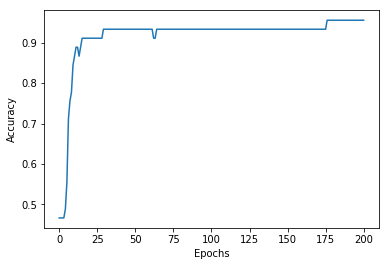

In [35]:
plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")

The graph of the accuracy over training steps(Epochs)

# Last words.
This is not the best dataset for the neural networks. I would suggest something huge, like really huge.
The accuracy of 97.778 might not the best we can get.We can tune the model more by changing the epochs, learning rate.
There is no much significane of this kernel, better accuracies might be achieved by using sklearn's logisticregression etc.This is just for my understanding of the neural networks.
Thankyou!